In [4]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

# 한글 폰트 설정
plt.rcParams['font.family'] = 'AppleGothic'  # MacOS의 기본 한글 폰트
plt.rcParams['axes.unicode_minus'] = False   # 마이너스 기호 깨짐 방지

In [5]:
import lightgbm
from sklearn.metrics import mean_squared_error
import numpy as np
import pandas as pd
import random
import os

# 시드 고정 함수
def set_seed(seed=42):
    random.seed(seed)
    os.environ['PYTHONHASHSEED'] = str(seed)
    np.random.seed(seed)
    
    lightgbm.seed = seed

set_seed(42)

/opt/anaconda3/lib/python3.11/site-packages/dask/dataframe/utils.py:367: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  _numeric_index_types = (pd.Int64Index, pd.Float64Index, pd.UInt64Index)
/opt/anaconda3/lib/python3.11/site-packages/dask/dataframe/utils.py:367: FutureWarning: pandas.Float64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  _numeric_index_types = (pd.Int64Index, pd.Float64Index, pd.UInt64Index)
/opt/anaconda3/lib/python3.11/site-packages/dask/dataframe/utils.py:367: FutureWarning: pandas.UInt64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  _numeric_index_types = (pd.Int64Index, pd.Float64Index, pd.UInt64Index)


In [6]:
import warnings

warnings.filterwarnings('ignore')

import pandas as pd

data = pd.read_csv('/Users/baby_cow/Desktop/AI/ML_competition/data/geocoded_addresses_12.csv')
data.columns

Index(['Unnamed: 0', '본번', '부번', '아파트명', '전용면적(㎡)', '계약년월', '계약일', '층', '건축년도',
       '도로명', '거래유형', 'k-전체동수', 'k-전체세대수', 'k-연면적', 'k-주거전용면적', 'k-관리비부과면적',
       'k-전용면적별세대현황(60㎡이하)', 'k-전용면적별세대현황(60㎡~85㎡이하)', 'k-85㎡~135㎡이하',
       'k-135㎡초과', '건축면적', '주차대수', 'target', 'is_test', 'latitude',
       'longitude', 'address', 'address_apt', 'address_apt_sqm', '구', '동',
       '강남여부', 'mean_target', 'apt_mean_target', 'address_mean_target',
       'mean_target_gu_dong', 'closest_bus_stop_distance',
       'closest_subway_station_distance', 'bus_stop_count_500m',
       'subway_station_count_500m', 'bus_stop_count_750m',
       'subway_station_count_750m', 'bus_stop_count_1000m',
       'subway_station_count_1000m', 'square_meter',
       'monthly_mean_target_rate', 'adjusted_square_meter', 'is_outlier',
       'year', 'month', 'distance_to_lead_house'],
      dtype='object')

In [7]:
temp_index = list(range(len(data)))
data['id'] = temp_index
selected_columns = ['id', '아파트명', '전용면적(㎡)', '계약년월', '계약일', '층', '구', '동', '건축년도','주차대수',
                    'k-전체동수', 'k-전체세대수', 'k-연면적', 'k-주거전용면적', 'k-관리비부과면적',
                    'k-전용면적별세대현황(60㎡이하)', 'k-전용면적별세대현황(60㎡~85㎡이하)', 'k-85㎡~135㎡이하',
                    'k-135㎡초과', '건축면적','latitude', 'longitude',
                    'closest_bus_stop_distance','closest_subway_station_distance', 'bus_stop_count_500m',
                    'subway_station_count_500m', 'bus_stop_count_750m',
                    'subway_station_count_750m', 'bus_stop_count_1000m',
                    'subway_station_count_1000m', 'distance_to_lead_house', 'is_test', 'target', 'apt_mean_target', 'mean_target']

df = data[selected_columns]

df['전용면적'] = df['전용면적(㎡)']
df.drop(columns=['전용면적(㎡)'], axis=1, inplace=True)

df['계약년'] = df['계약년월'].map(lambda x : int(str(x)[:4]))

df['계약년월'] = df['계약년월'].astype(np.datetime64)



In [18]:
# 집 유형 나누기

def house_type(x):
    house_type_list = [0, 45, 90, 130]

    for type, size in enumerate(house_type_list):
        if x < size:
            return type
    return 4

df['집유형'] = df['전용면적'].apply(house_type)
df['집유형'] = df['집유형'].astype(int)

In [19]:
chunks = {}

regions = df['구'].unique()

for region in regions:
    chunk = df[df['구'] == region]
    chunk.sort_values(by='계약년월')
    chunks[region] = chunk

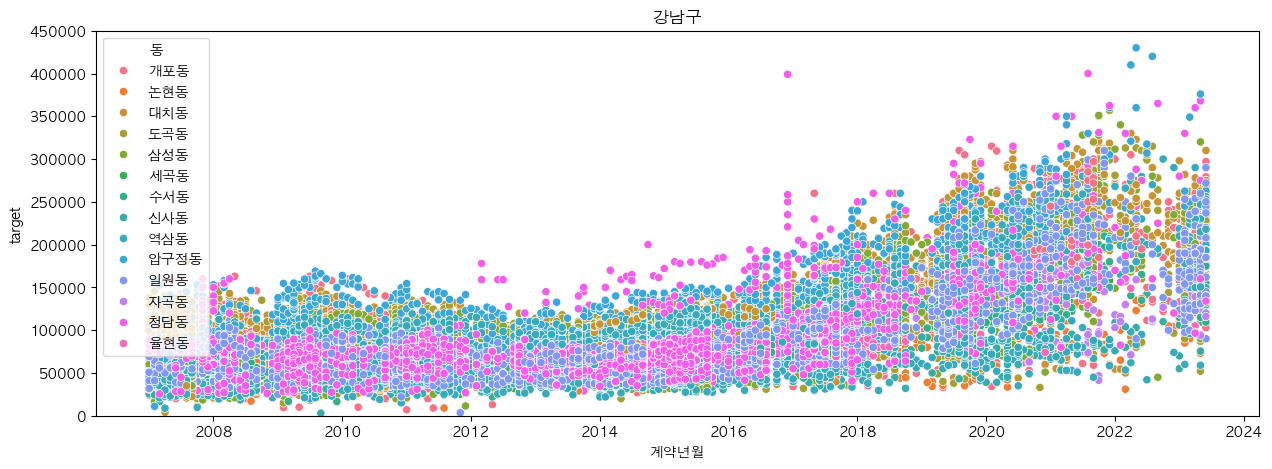

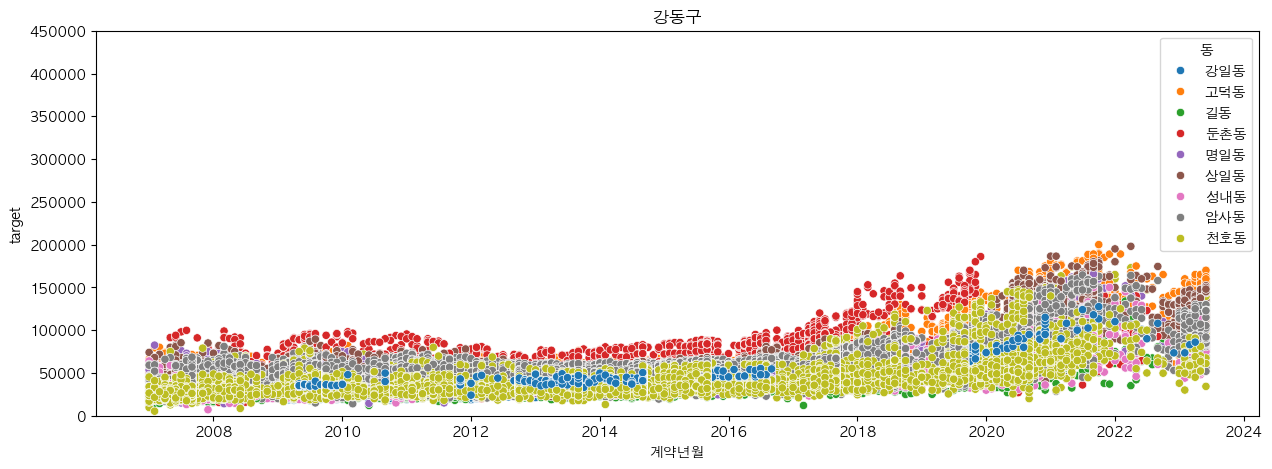

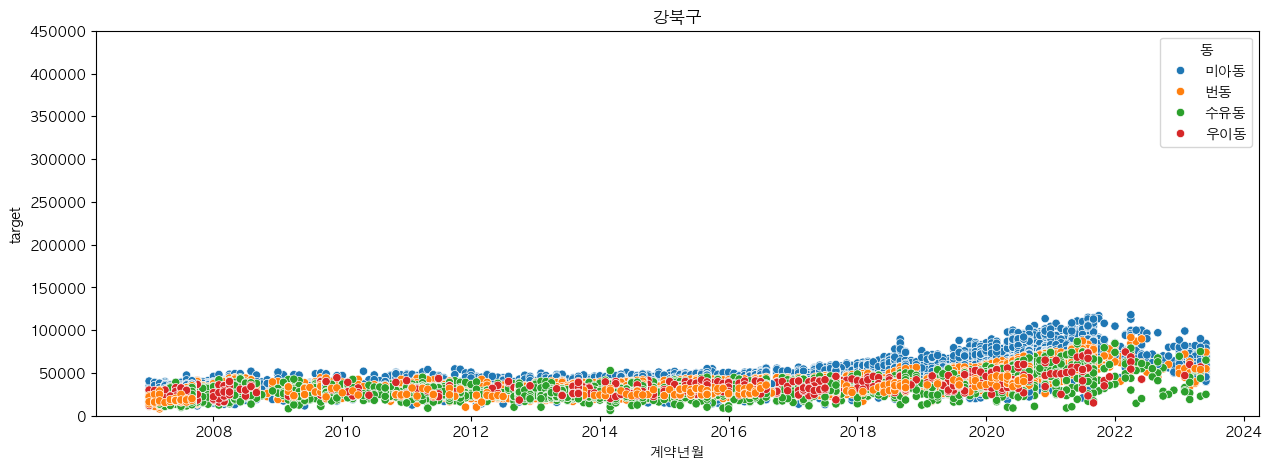

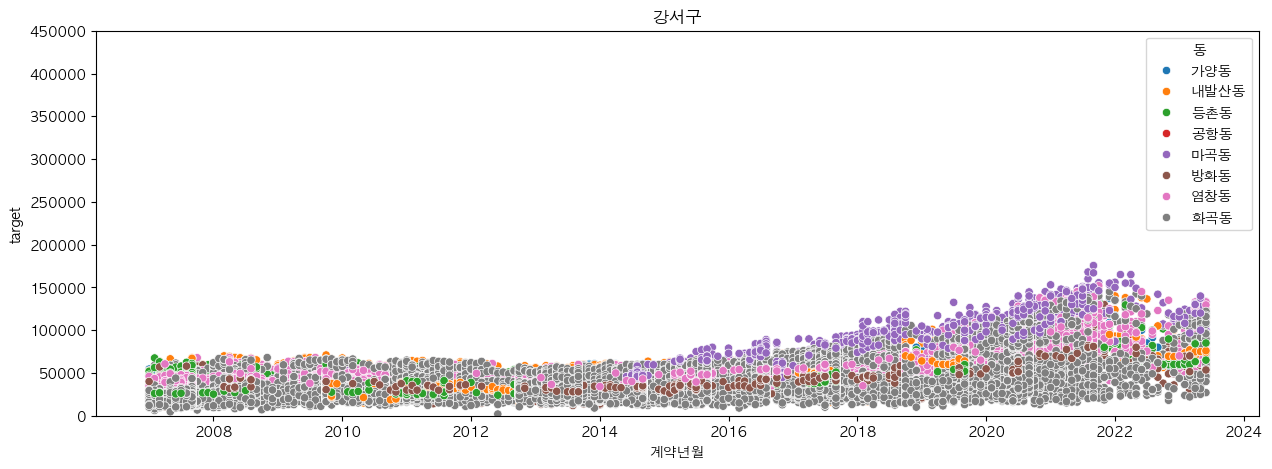

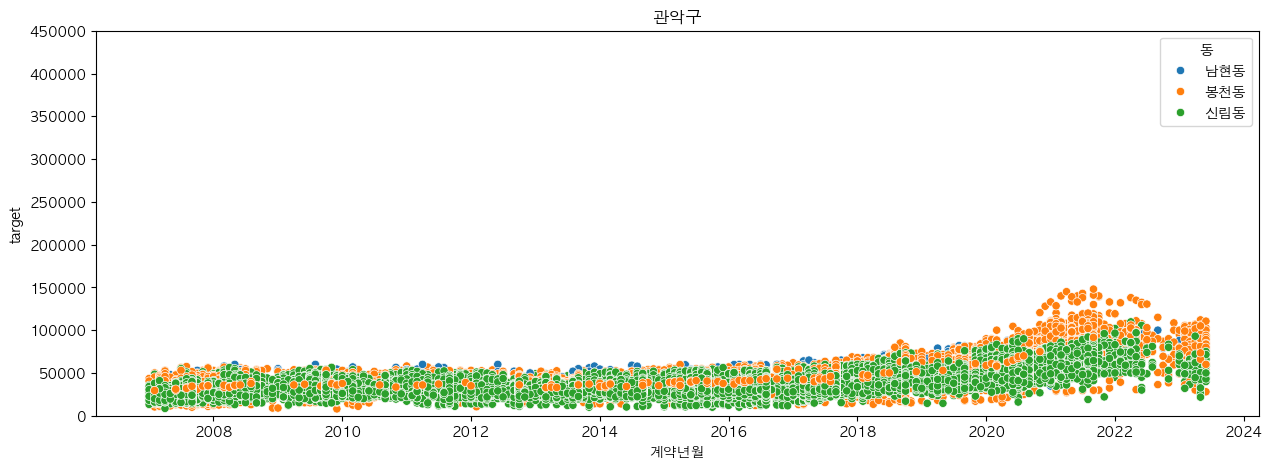

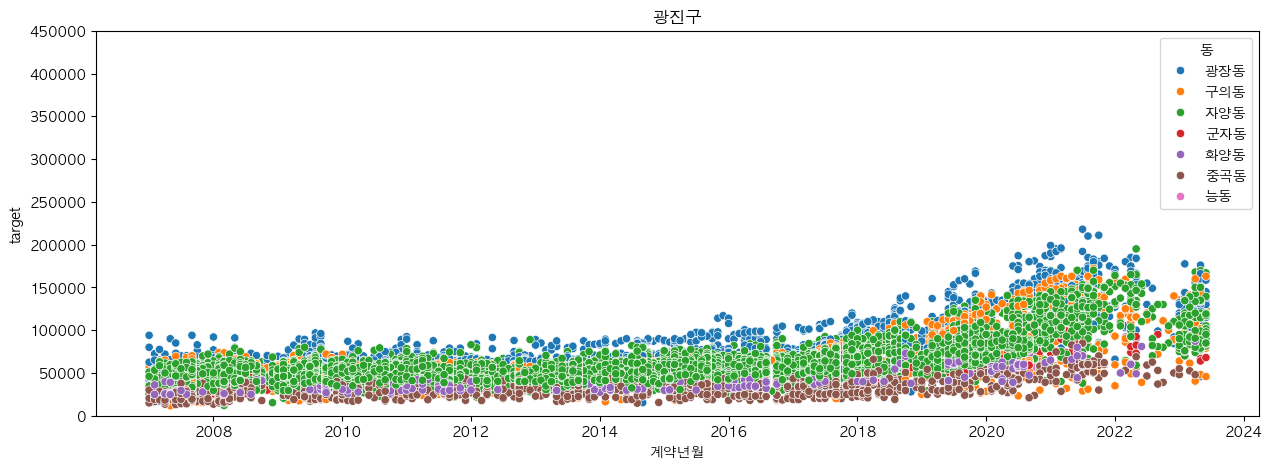

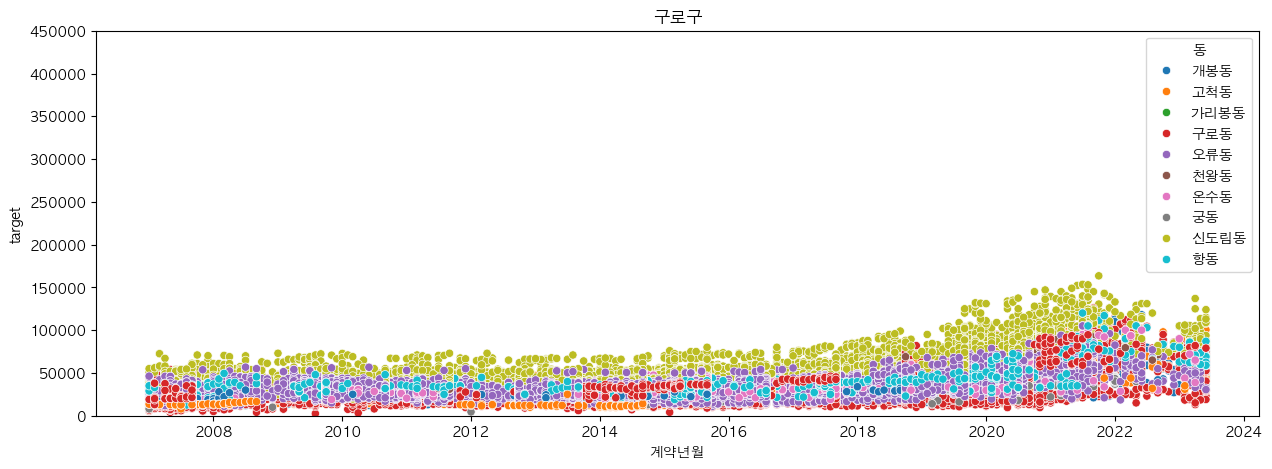

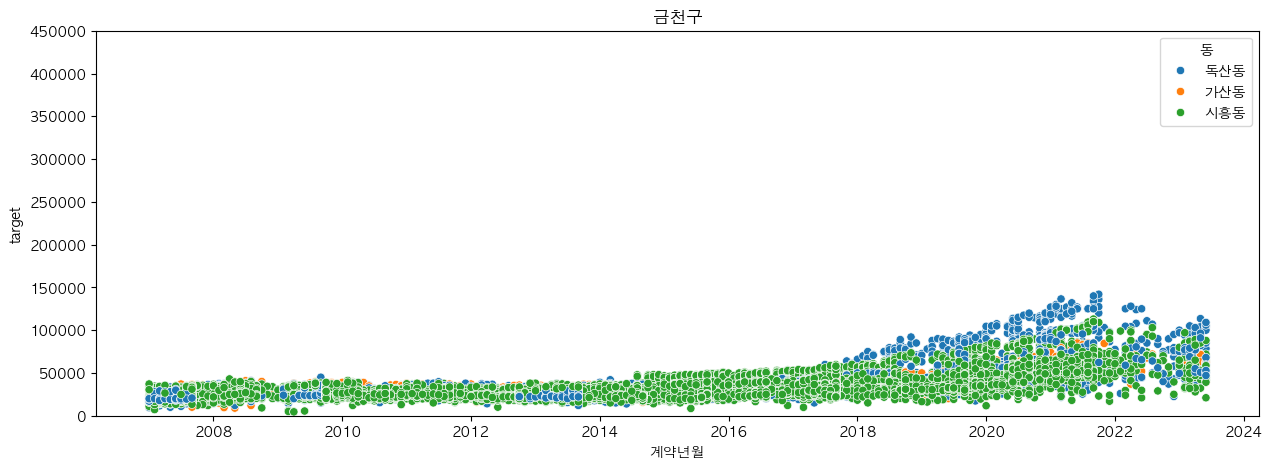

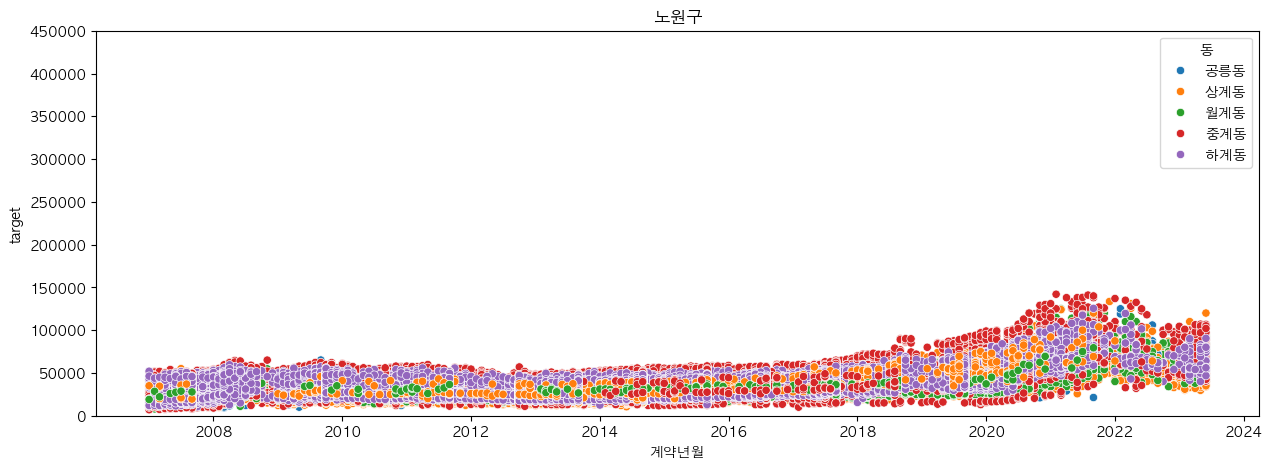

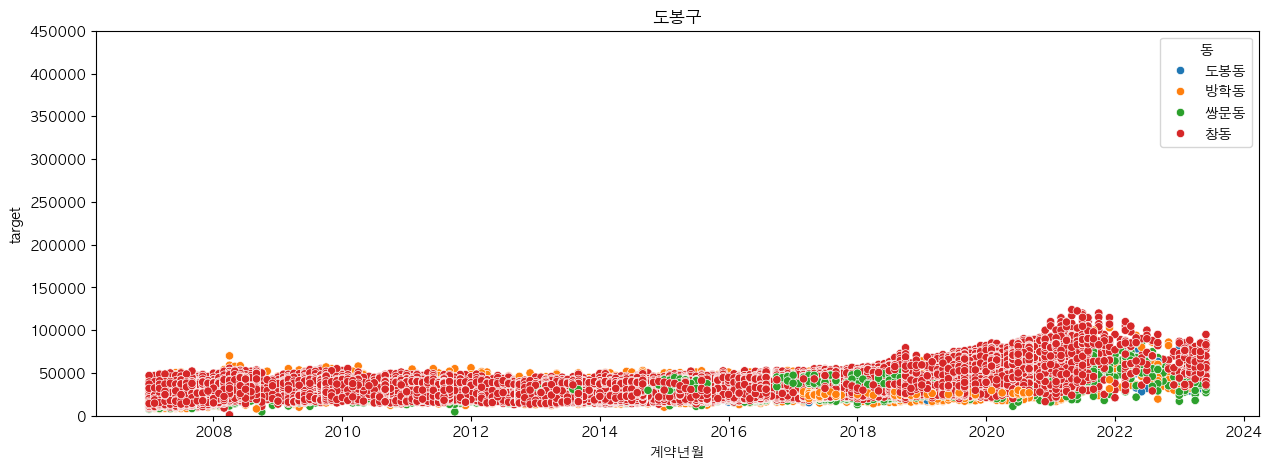

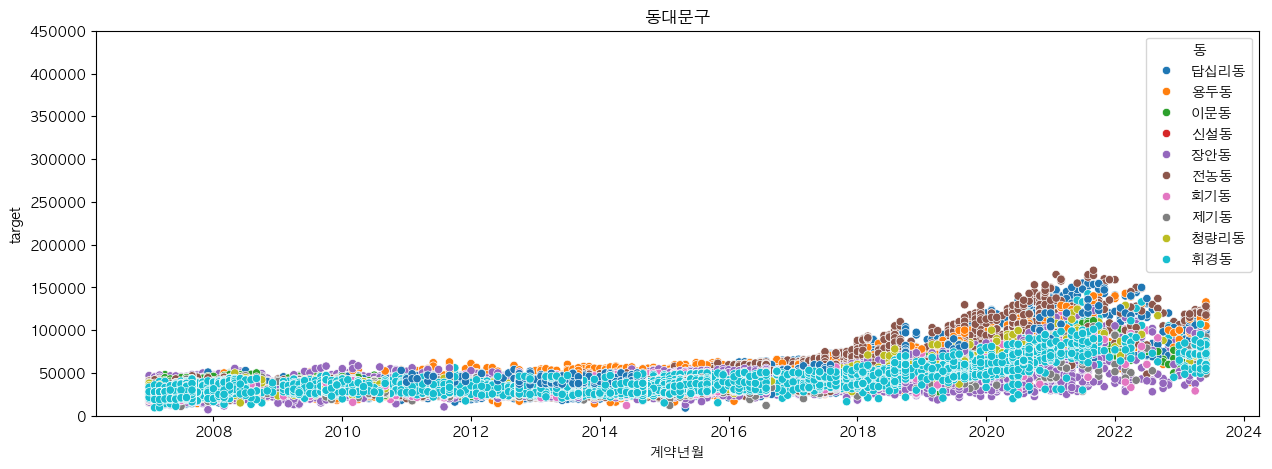

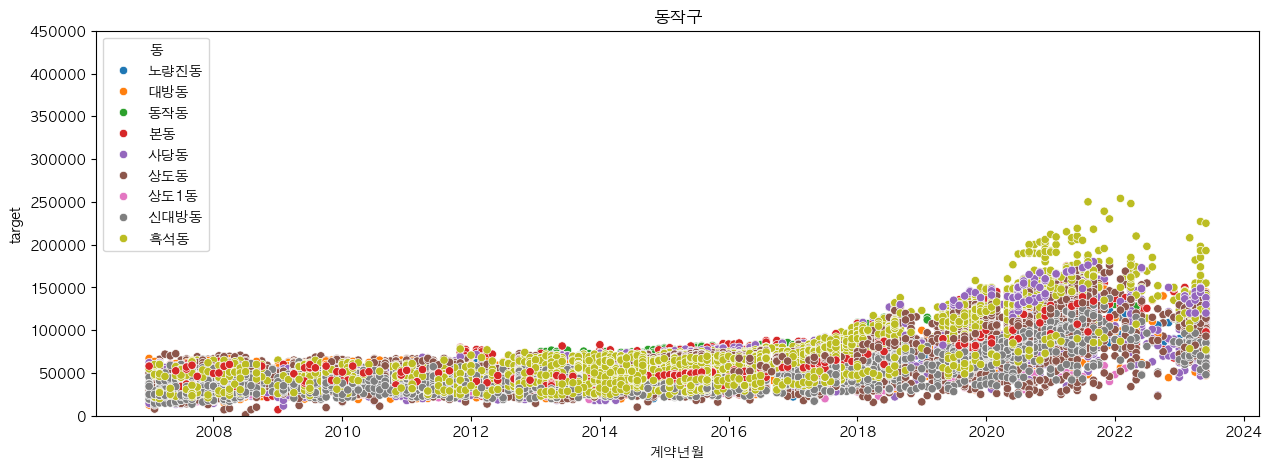

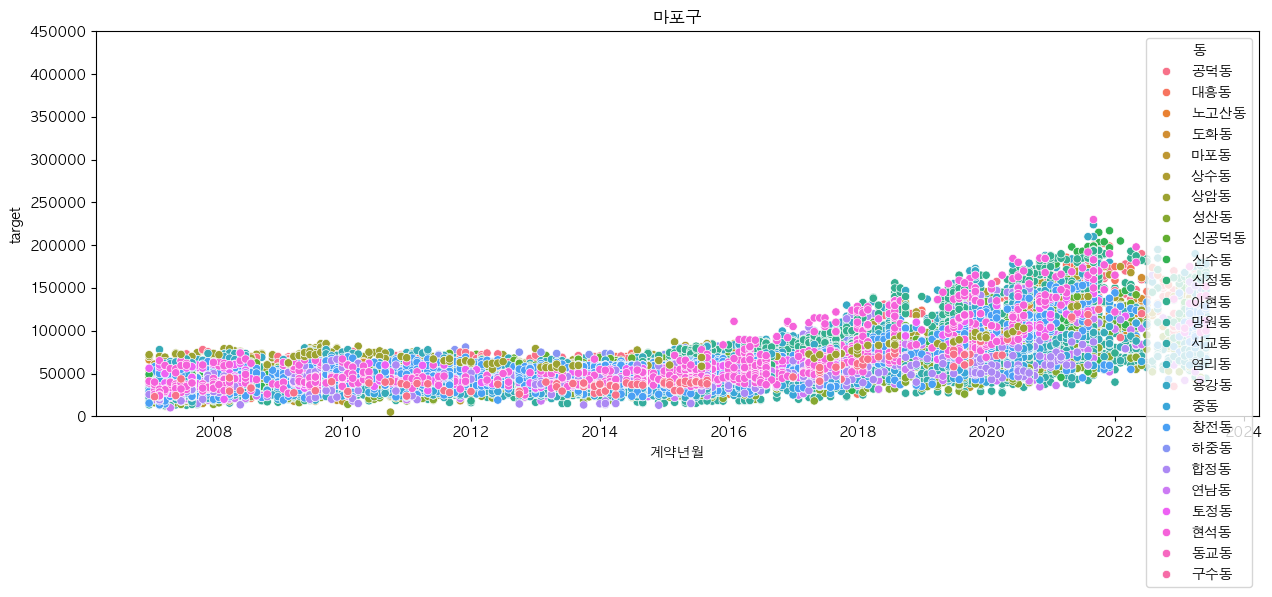

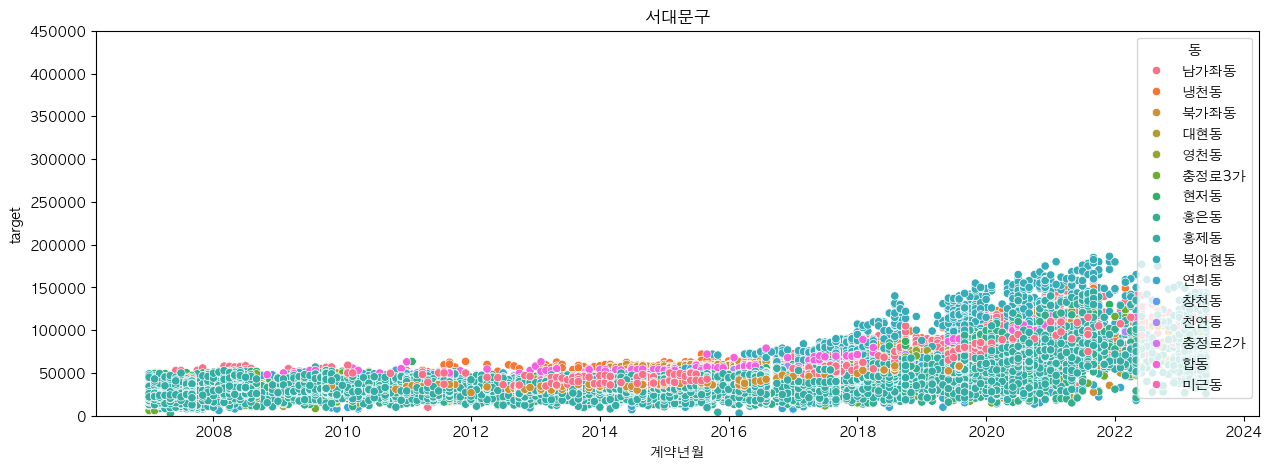

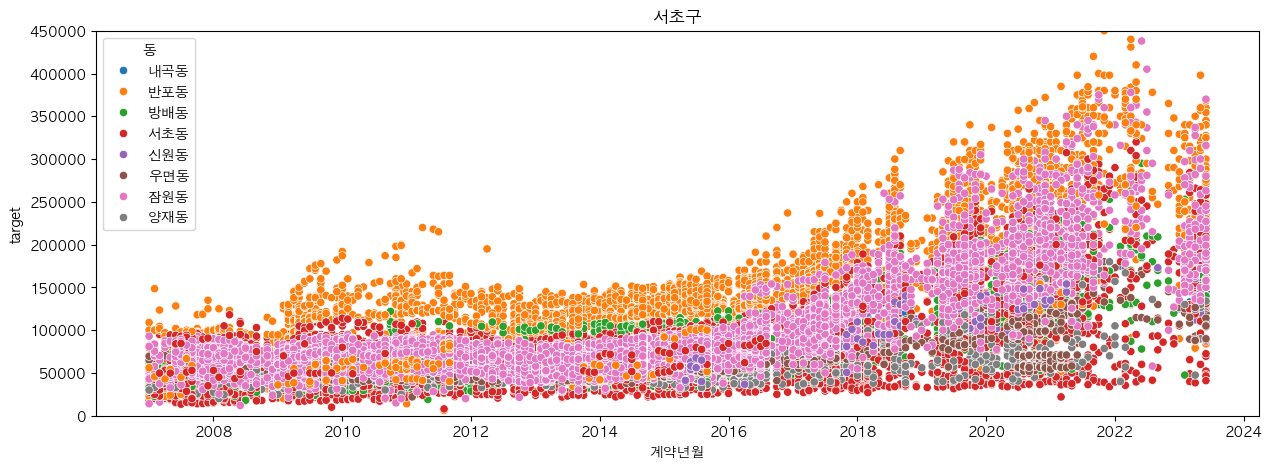

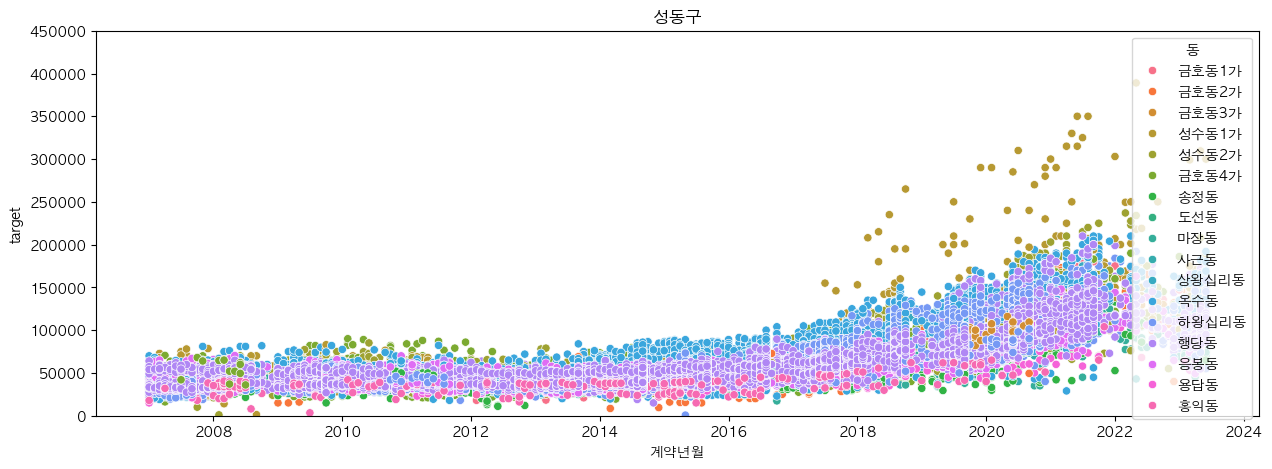

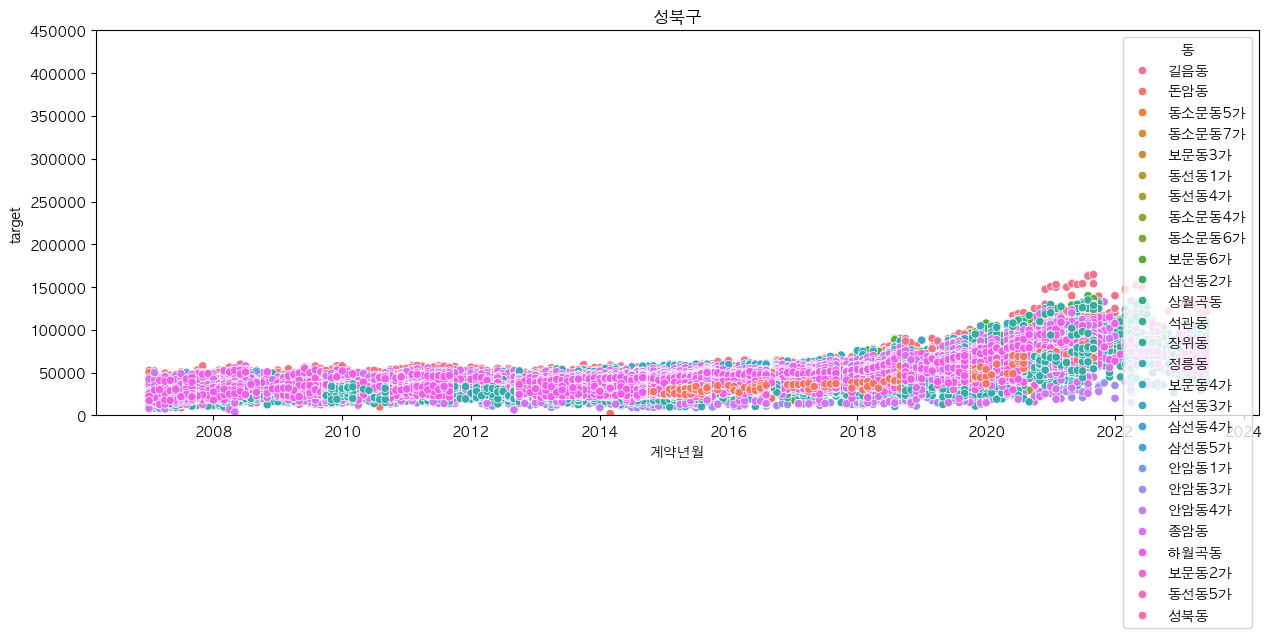

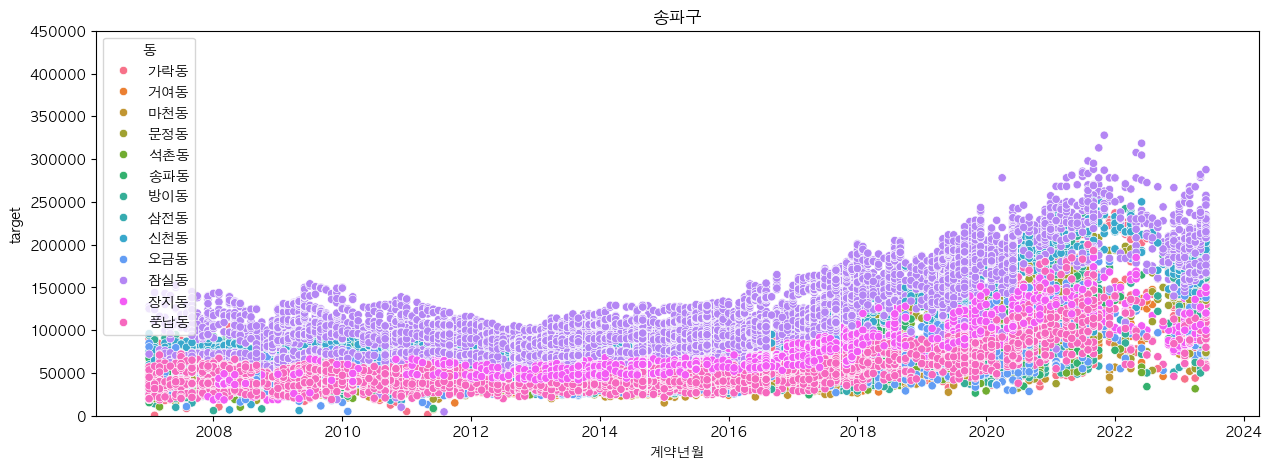

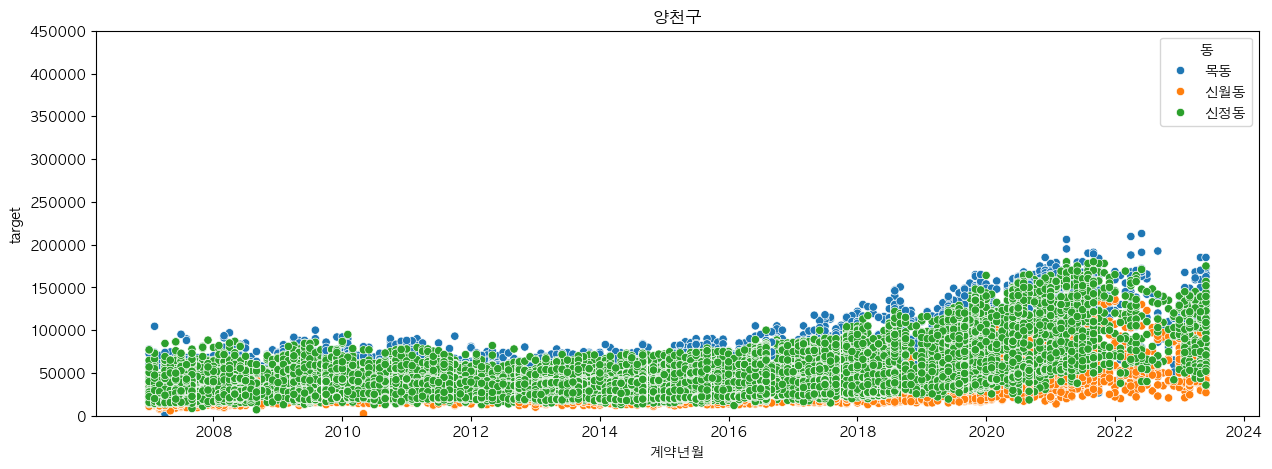

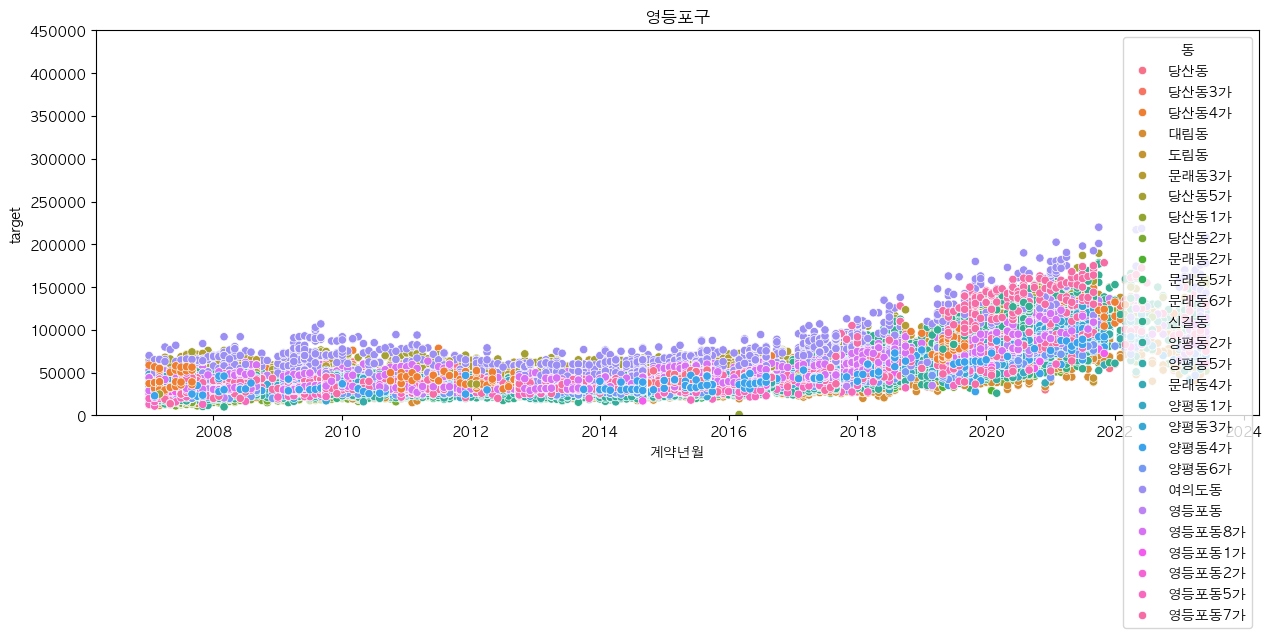

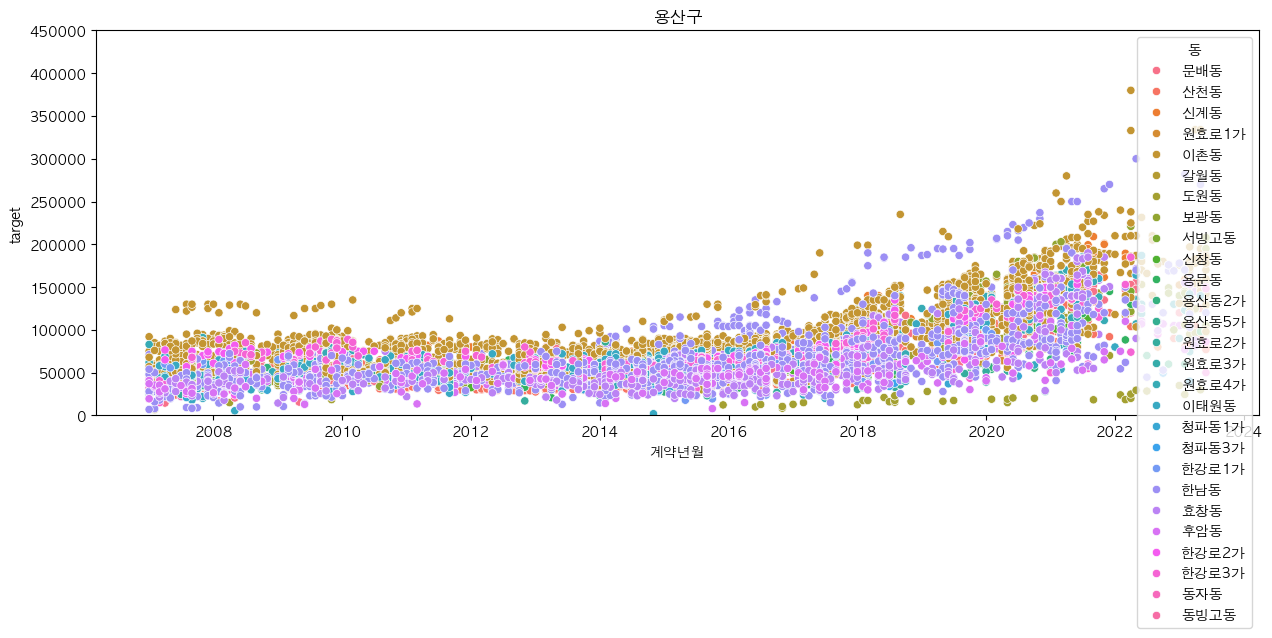

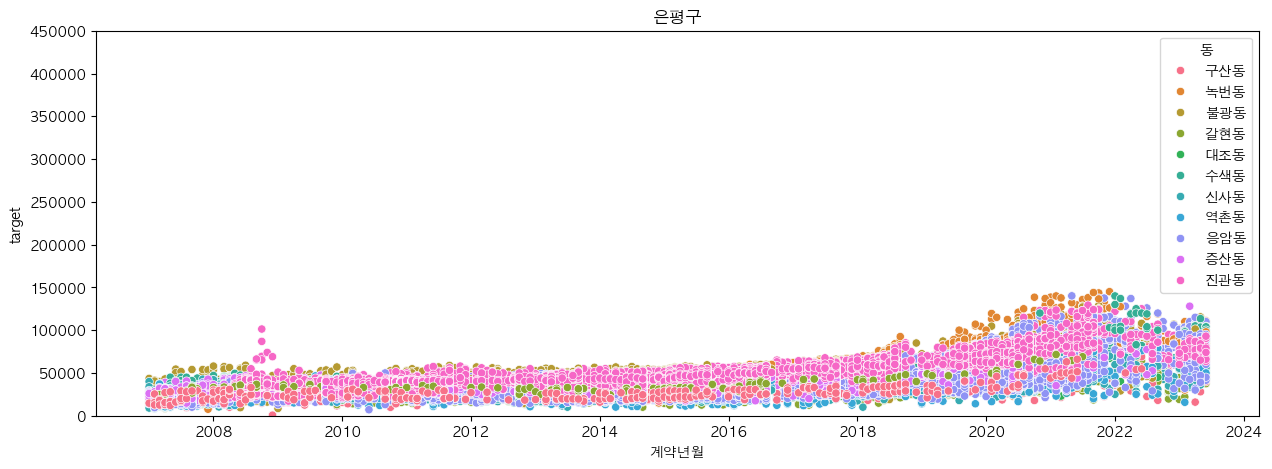

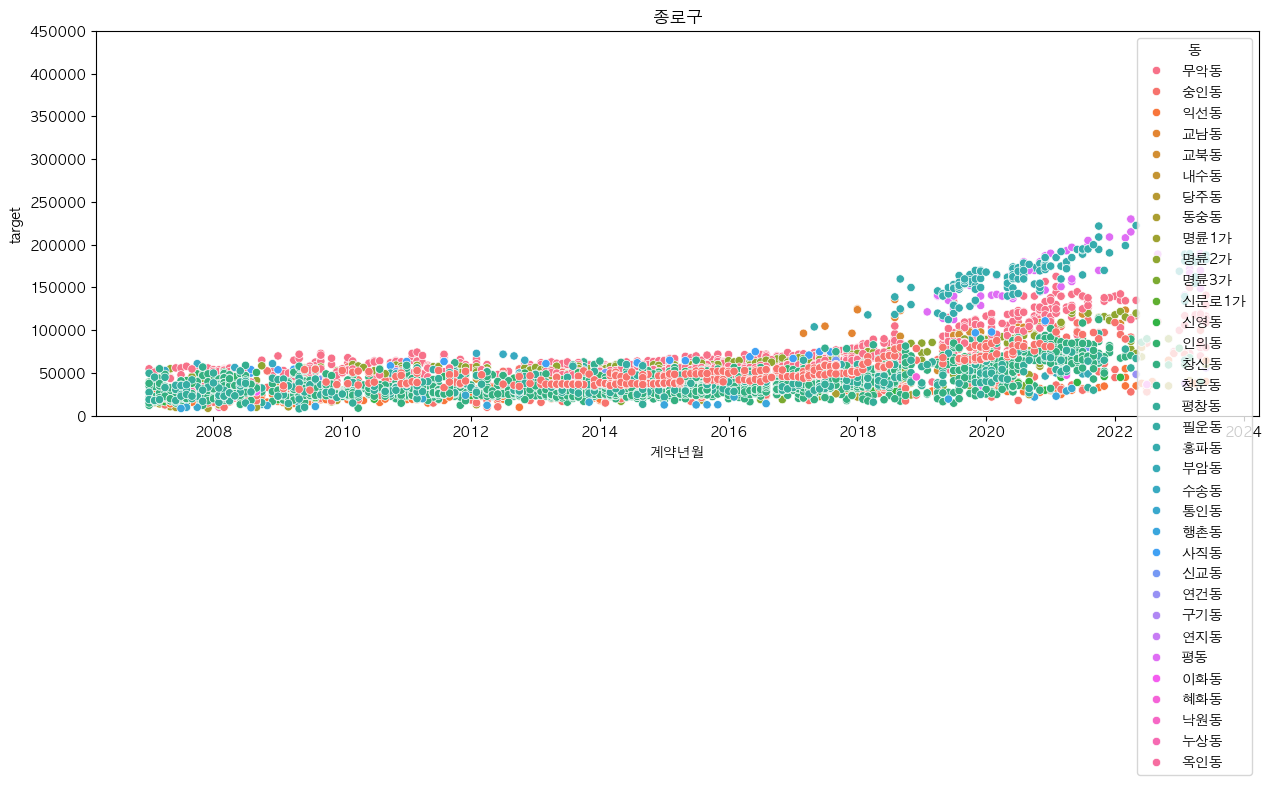

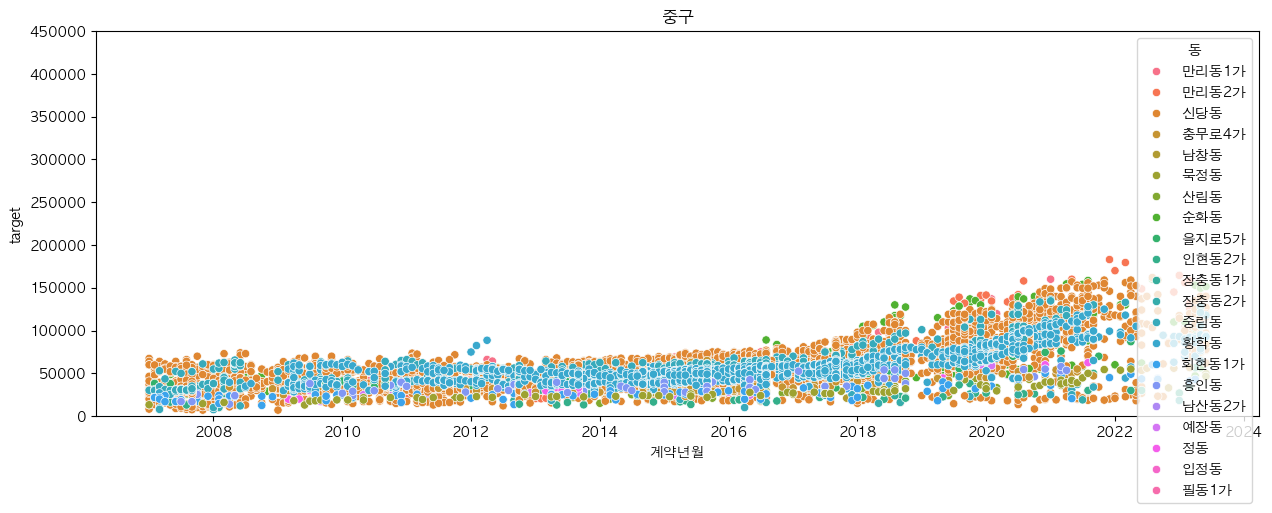

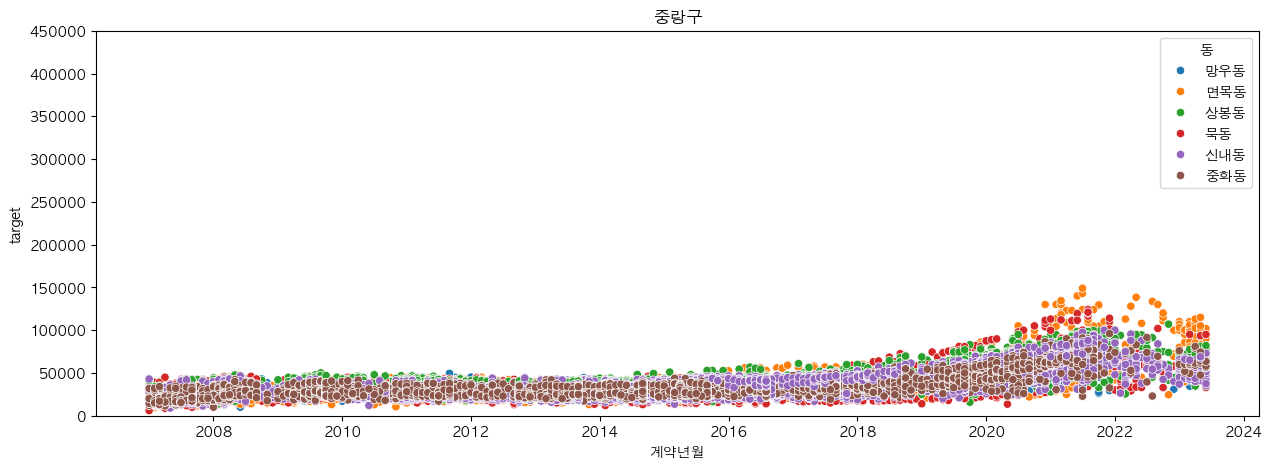

In [21]:
from IPython.display import display
import matplotlib.pyplot as plt
import seaborn as sns

cnt = 0
for region in regions:
    chunk = chunks[region]

    type = 2
    house_type = chunk.loc[(chunk['집유형'] == type) & (chunk['is_test'] == 0)]

    plt.figure(figsize=(15,5))
    plt.title(region)
    sns.scatterplot(data=house_type, x = '계약년월', y='target', hue='동')
    plt.ylim(0, 450000)

(-10.695000000000004, 445.03499999999997)

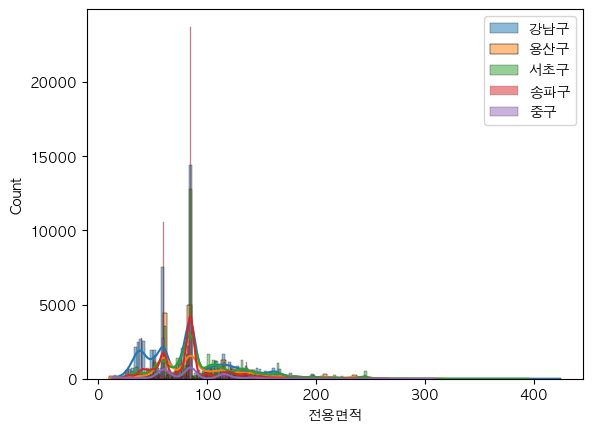

In [11]:

worst_regions = ['강남구', '용산구', '서초구', '송파구', '중구']

for region in worst_regions:
    temp_df = chunks[region]
    sns.histplot(data=temp_df, x= '전용면적', kde=True, label=region)
    plt.legend()

plt.xlim()

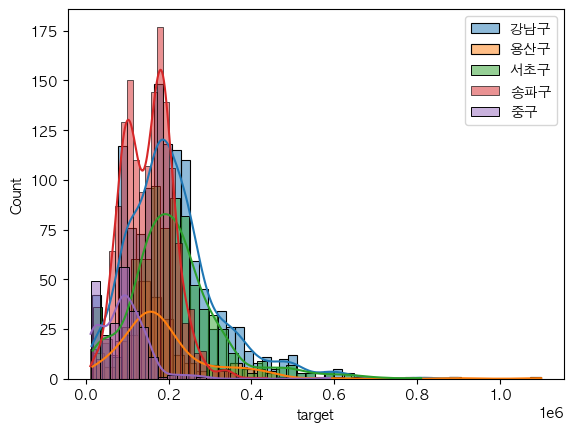

In [12]:
for region in worst_regions:
    chunk = chunks[region][chunks[region]['계약년'] > 2022]
    sns.histplot(data = chunk, x = 'target', kde=True, label = region)
plt.legend()

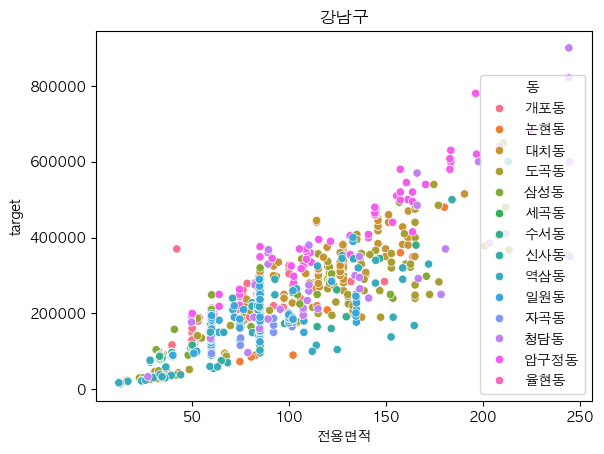

In [13]:
for region in worst_regions:
    chunk = chunks[region][chunks[region]['계약년'] > 2022]
    plt.title(region)
    sns.scatterplot(data = chunk, y = 'target', x = '전용면적', hue='동')
    break
#plt.legend()

(0.0, 150.0)

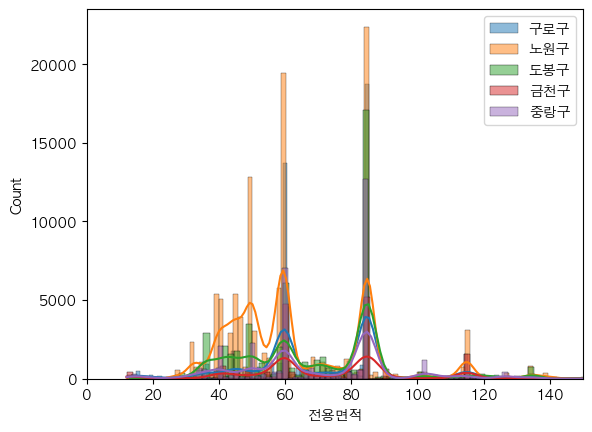

In [14]:
best_regions = ['구로구', '노원구', '도봉구', '금천구', '중랑구']

for region in best_regions:
    chunk = chunks[region]
    sns.histplot(data= chunk, x = '전용면적', kde= True, label=region)
plt.legend()
plt.xlim(0, 150)

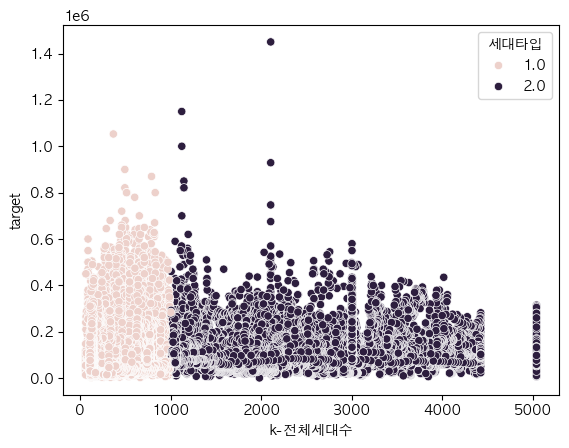

In [30]:

for region in regions:
    chunk = chunks[region]

    chunk.loc[chunk['k-전체세대수'] < 1000, '세대타입'] = 1
    chunk.loc[chunk['k-전체세대수'] > 1000, '세대타입'] = 2

    sns.scatterplot(data=chunk, x = 'k-전체세대수', y= 'target', hue='세대타입')
    break

# 모델 학습

In [15]:
import lightgbm as lgb
import numpy as np
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import mean_squared_error
from tqdm import tqdm

result_board = []
result = pd.DataFrame()
trained_models = {}

params = {
    'objective': 'regression', 
    'metric': 'rmse',           
    'boosting_type': 'gbdt',
    'num_leaves': 31,
    'learning_rate': 0.1,
    'feature_fraction': 0.9,
    'lambda_l2' : 0.1,
    'drop_rate' : 0.2,
    'verbose' : -1
}

for region in tqdm(regions):
    chunk = chunks[region]

    select_cols = ['id', '전용면적', '계약일', '층', '건축년도','주차대수',
                    'k-전체동수', 'k-전체세대수', 'k-연면적', 'k-주거전용면적', 'k-관리비부과면적',
                    'k-전용면적별세대현황(60㎡이하)', 'k-전용면적별세대현황(60㎡~85㎡이하)', 'k-85㎡~135㎡이하',
                    'k-135㎡초과', '건축면적','latitude', 'longitude',
                    'closest_bus_stop_distance','closest_subway_station_distance', 'bus_stop_count_500m',
                    'subway_station_count_500m', 'bus_stop_count_750m',
                    'subway_station_count_750m', 'bus_stop_count_1000m',
                    'subway_station_count_1000m', 'distance_to_lead_house', 'is_test', 'target',
                    'apt_mean_target', 'mean_target', '집유형']
    
    chunk = chunk[select_cols]

    train_chunk = chunk.query('is_test == 0')
    test_chunk = chunk.query('is_test == 1')

    train_chunk.drop(columns=['is_test', 'id'], axis=1, inplace = True)
    test_chunk.drop(columns = ['is_test'], axis = 1, inplace = True)

    X = train_chunk.drop(columns=['target'], axis=1)
    y = train_chunk['target']

    tscv = TimeSeriesSplit(n_splits = 17)
    
    min_rmse = int(1e9)

    model = None
    for fold, (train_index, val_index) in enumerate(tscv.split(X), 1):
        X_train, X_val = X.iloc[train_index], X.iloc[val_index]
        y_train, y_val = y.iloc[train_index], y.iloc[val_index]

        train_data = lgb.Dataset(X_train, label = y_train)
        val_data = lgb.Dataset(X_val, label = y_val, reference = train_data)

        if model :
            model = lgb.train(
                params,
                train_data,
                num_boost_round=5000,
                init_model = model,
                valid_sets = [train_data, val_data],
                callbacks = [lgb.early_stopping(stopping_rounds=5), lgb.log_evaluation(period=-1)],
            )
        else:
            model = lgb.train(
                params,
                train_data,
                num_boost_round=5000,
                valid_sets = [train_data, val_data],
                callbacks = [lgb.early_stopping(stopping_rounds=5), lgb.log_evaluation(period=-1)],
            )
        y_pred = model.predict(X_val)
        rmse = np.sqrt(mean_squared_error(y_val, y_pred))
        min_rmse = min(min_rmse, rmse)

    result_board.append({"지역" : region, "validation RMSE" : min_rmse})

    final_train_data = lgb.Dataset(X, label=y)
    final_model = lgb.train(params,
                            final_train_data,
                            init_model = model,
                            num_boost_round=model.best_iteration,
                            callbacks = [lgb.log_evaluation(period=-1)],
                            )
    
    trained_models[region] = final_model

    test_X = test_chunk.drop(columns=['id', 'target'], axis=1)
    pred = final_model.predict(test_X)

    test_chunk['target'] = pred

    result = pd.concat([result, test_chunk[['id', 'target']]]) 


  0%|          | 0/25 [00:00<?, ?it/s]

Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[33]	training's rmse: 15552.9	valid_1's rmse: 49536.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[59]	training's rmse: 14100.2	valid_1's rmse: 15864.4
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[62]	training's rmse: 14176.4	valid_1's rmse: 80345.1
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[126]	training's rmse: 22069.8	valid_1's rmse: 88810
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[185]	training's rmse: 28708.2	valid_1's rmse: 52190.3
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[192]	training's rmse: 30447.6	valid_1's rmse: 46206.4
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[194]	trai

  4%|▍         | 1/25 [00:07<03:11,  7.97s/it]

Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[11]	training's rmse: 9751.09	valid_1's rmse: 19611.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[59]	training's rmse: 4369.78	valid_1's rmse: 7339.55
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[81]	training's rmse: 4028.32	valid_1's rmse: 23950.9
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[156]	training's rmse: 5638.58	valid_1's rmse: 43162.8
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[170]	training's rmse: 11291.2	valid_1's rmse: 17970.8
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[213]	training's rmse: 10339.8	valid_1's rmse: 15687.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[214]	tr

  8%|▊         | 2/25 [00:15<03:00,  7.84s/it]

Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[65]	training's rmse: 2439.53	valid_1's rmse: 6759.76
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[106]	training's rmse: 2417.39	valid_1's rmse: 3370.13
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[107]	training's rmse: 2695.23	valid_1's rmse: 31411.3
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[164]	training's rmse: 5402.98	valid_1's rmse: 17395.4
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[165]	training's rmse: 8657.85	valid_1's rmse: 10992.7
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[172]	training's rmse: 6932.64	valid_1's rmse: 11341.8
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[173]	

 12%|█▏        | 3/25 [00:20<02:23,  6.50s/it]

Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[27]	training's rmse: 4729.9	valid_1's rmse: 12450.8
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[47]	training's rmse: 4357.77	valid_1's rmse: 5809.83
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[48]	training's rmse: 4755.75	valid_1's rmse: 38804.2
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[89]	training's rmse: 10275.3	valid_1's rmse: 24196.6
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[170]	training's rmse: 10296	valid_1's rmse: 9620.47
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[216]	training's rmse: 9625.29	valid_1's rmse: 15961
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[266]	training

 16%|█▌        | 4/25 [00:30<02:40,  7.65s/it]

Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[19]	training's rmse: 4030.78	valid_1's rmse: 9525.58
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[65]	training's rmse: 2932.62	valid_1's rmse: 4081.85
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[66]	training's rmse: 3283.74	valid_1's rmse: 36785.4
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[99]	training's rmse: 8422.28	valid_1's rmse: 11294.9
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[122]	training's rmse: 8277.68	valid_1's rmse: 10814.3
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[148]	training's rmse: 7835.01	valid_1's rmse: 13237.9
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[149]	tra

 20%|██        | 5/25 [00:35<02:20,  7.01s/it]

Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[30]	training's rmse: 6728.79	valid_1's rmse: 22138.7
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[74]	training's rmse: 5543.39	valid_1's rmse: 8134.78
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[104]	training's rmse: 5212.7	valid_1's rmse: 49781.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[178]	training's rmse: 10154.1	valid_1's rmse: 53407.8
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[192]	training's rmse: 14664.4	valid_1's rmse: 39185.4
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[204]	training's rmse: 13856.8	valid_1's rmse: 25147.9
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[221]	tr

 24%|██▍       | 6/25 [00:41<02:04,  6.56s/it]

Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[47]	training's rmse: 2578.92	valid_1's rmse: 9694.3
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[70]	training's rmse: 3063.09	valid_1's rmse: 5726.25
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[89]	training's rmse: 3221.52	valid_1's rmse: 34355.1
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[120]	training's rmse: 6903.65	valid_1's rmse: 16117.3
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[130]	training's rmse: 7440.23	valid_1's rmse: 19291.3
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[157]	training's rmse: 7073.04	valid_1's rmse: 12590.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[187]	tra

 28%|██▊       | 7/25 [00:49<02:04,  6.91s/it]

Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[43]	training's rmse: 2063.25	valid_1's rmse: 7416.09
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[44]	training's rmse: 4975.93	valid_1's rmse: 11536
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[50]	training's rmse: 5076.95	valid_1's rmse: 26241.1
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[60]	training's rmse: 8281.69	valid_1's rmse: 19323.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[63]	training's rmse: 9701.66	valid_1's rmse: 7985.68
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[64]	training's rmse: 9051.72	valid_1's rmse: 8778.23
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[65]	training

 32%|███▏      | 8/25 [00:52<01:39,  5.84s/it]

Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[28]	training's rmse: 2707.81	valid_1's rmse: 8607.73
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[41]	training's rmse: 3075.4	valid_1's rmse: 3879.86
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[42]	training's rmse: 3262.39	valid_1's rmse: 34477.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[79]	training's rmse: 6242.55	valid_1's rmse: 24635.4
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[100]	training's rmse: 7240.76	valid_1's rmse: 15411.4
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[109]	training's rmse: 7492.12	valid_1's rmse: 14305.9
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[110]	trai

 32%|███▏      | 8/25 [00:59<02:07,  7.47s/it]


KeyboardInterrupt: 

# 결과확인

7844.401563914663


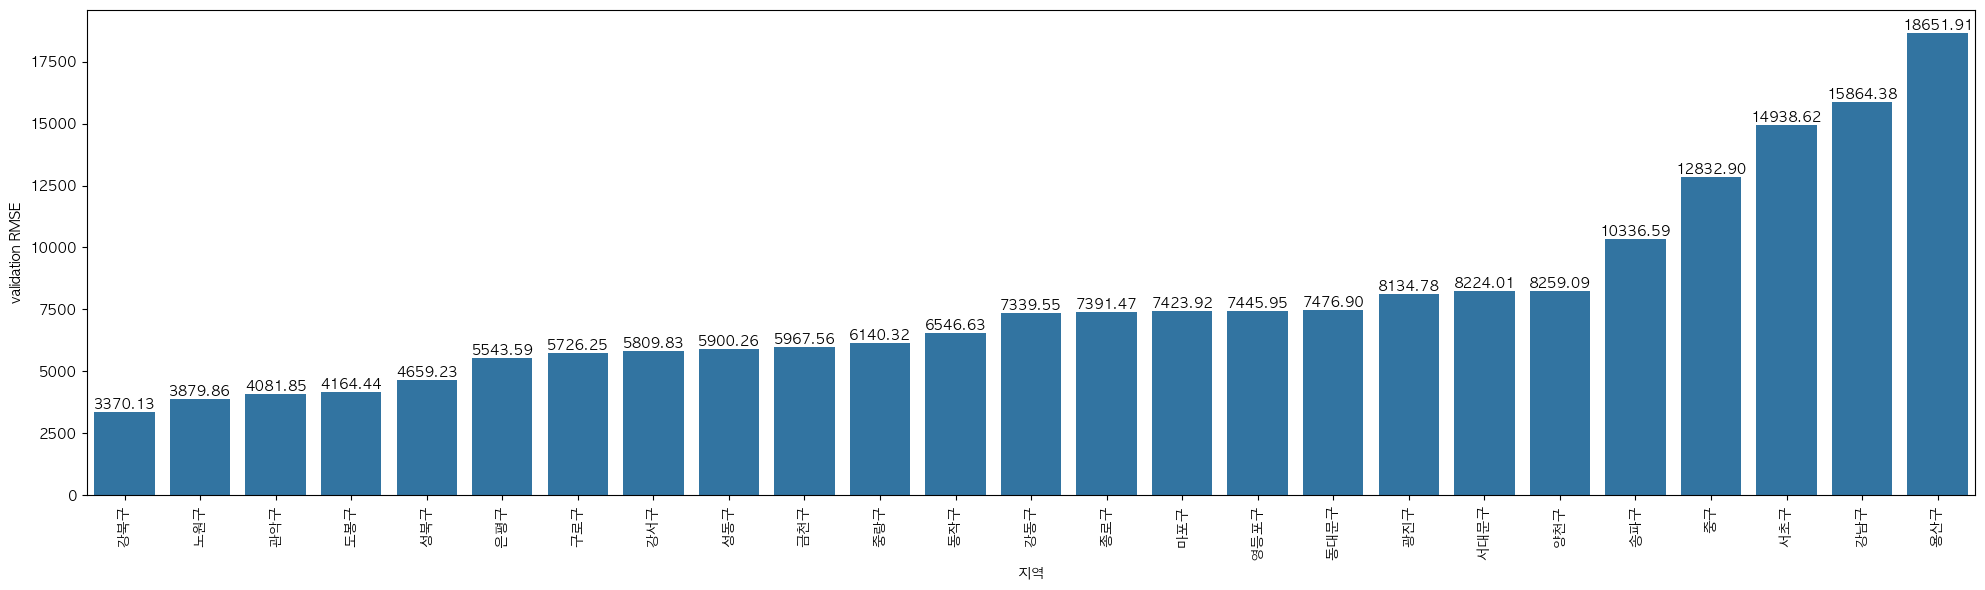

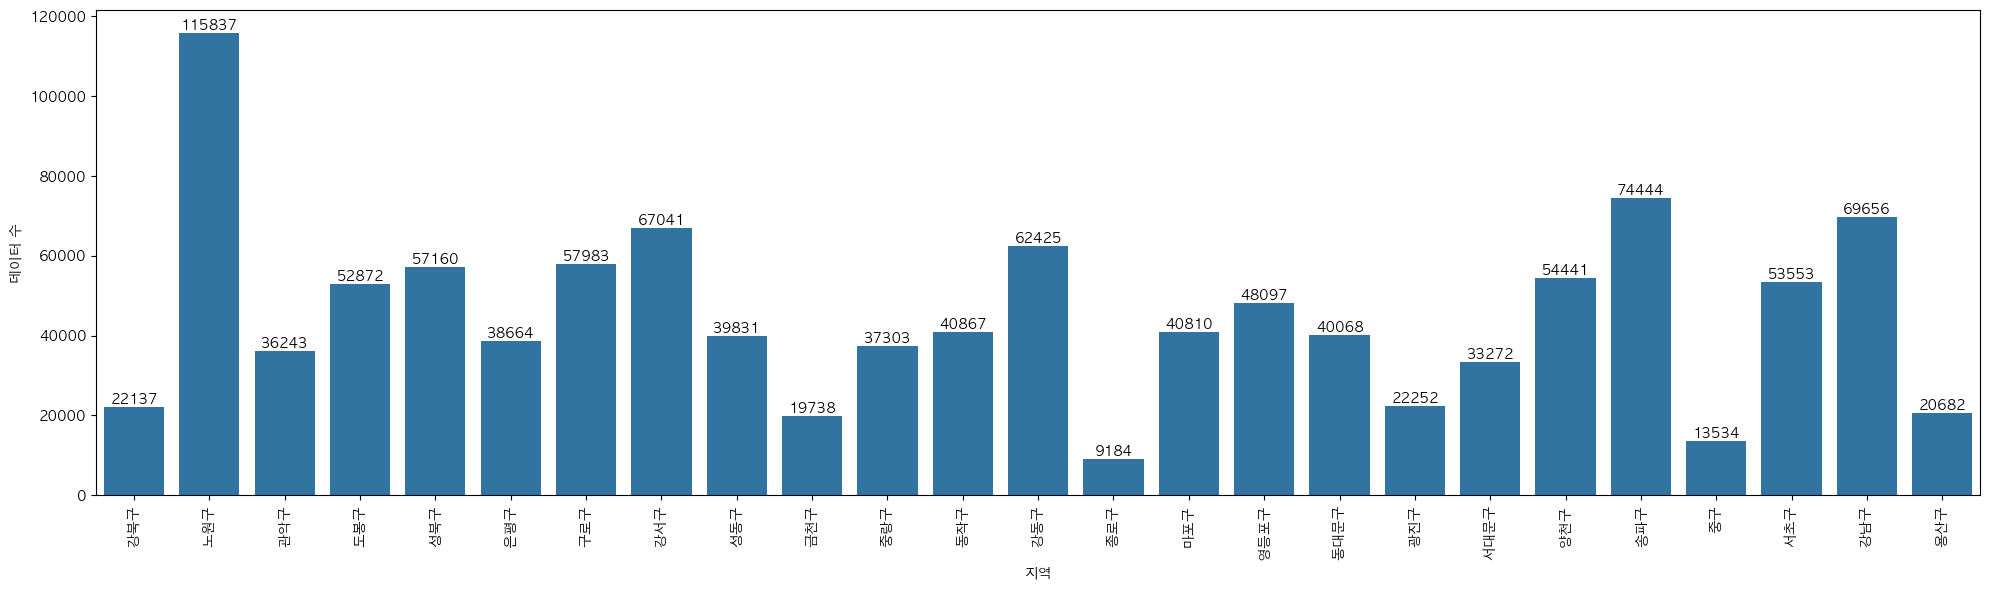

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

result_df = pd.DataFrame(result_board)
result_df = result_df.sort_values(by='validation RMSE')
result_df = result_df[-30:]

print(result_df['validation RMSE'].mean())

# 그래프 생성
plt.figure(figsize=(20, 6))
ax = sns.barplot(data=result_df, x='지역', y='validation RMSE')

# 바 위에 값 표시
for i, v in enumerate(result_df['validation RMSE']):
    ax.text(i, v, f'{v:.2f}', ha='center', va='bottom')

plt.xticks(rotation='vertical')
plt.tight_layout()
plt.show()


temp_list = [{"지역" : region, "데이터 수" : len(chunks[region])} for region in result_df['지역']]
temp_df = pd.DataFrame(temp_list)

plt.figure(figsize=(20, 6))
ax = sns.barplot(data = temp_df, x='지역', y='데이터 수')

# 바 위에 값 표시
for i, v in enumerate(temp_df['데이터 수']):
    ax.text(i, v, f'{v}', ha='center', va='bottom')

plt.xticks(rotation='vertical')
plt.tight_layout()
plt.show()

In [ ]:
submit = result.sort_values(by = 'id')

display(submit)
print(submit.isnull().sum())

submit['target'] = submit['target'] * 1.065
submit['target'] = submit['target'].astype(int)
submit.to_csv('house_type.csv', index=False)

id         target
1118822  1118822  128390.953302
1118823  1118823  206117.366306
1118824  1118824  180541.414541
1118825  1118825  142459.765139
1118826  1118826  116450.681381
...          ...            ...
1128089  1128089   47263.352920
1128090  1128090   31438.365461
1128091  1128091   48514.933915
1128092  1128092   44925.467202
1128093  1128093   41493.868063

[9272 rows x 2 columns]

id        0
target    0
dtype: int64


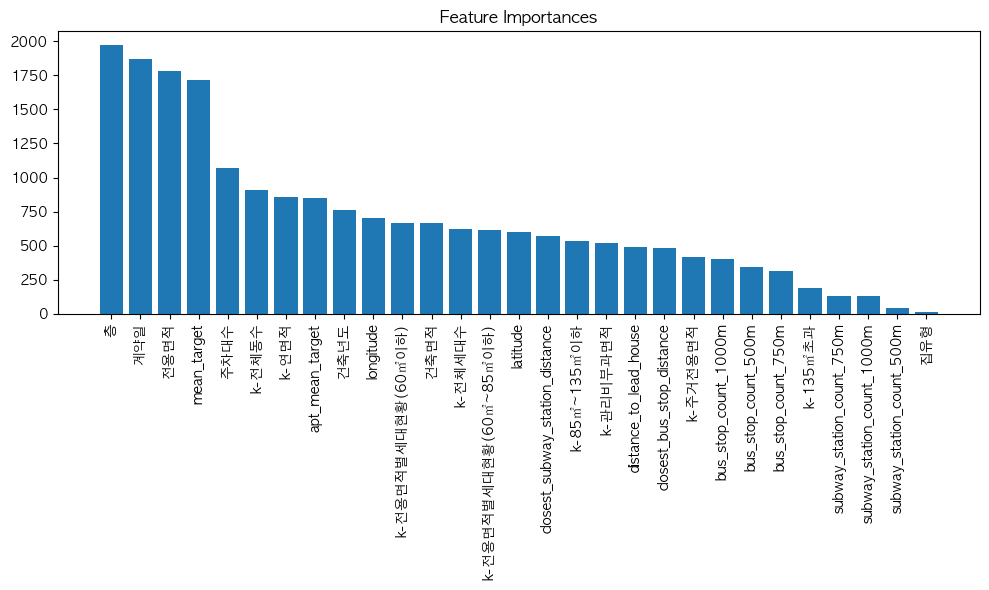

In [41]:
import matplotlib.pyplot as plt
import numpy as np

# 특성 중요도와 특성 이름 가져오기
importances = model.feature_importance()

feature_names = X.columns  # X는 특성 데이터프레임

# 중요도에 따라 특성 정렬
indices = np.argsort(importances)[::-1]

# 시각화
plt.figure(figsize=(10, 6))
plt.title("Feature Importances")
plt.bar(range(len(importances)), importances[indices])
plt.xticks(range(len(importances)), [feature_names[i] for i in indices], rotation=90)
plt.tight_layout()
plt.show()